## Comparing users inside a group

What we can do is find useful data for each user in a group ie:
* number of times they revised
* total time spent on the platform
* total number of revisions when revising 

Let's start our study on group 1 -- with adaptive feedback and reflective prompts.
Let's import useful data

In [8]:
import import_ipynb
from RevisionsStudy import get_data_per_session, data_computation_on_groups, get_total_time_spent_for_user
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(font_scale=1.2)

In [5]:
%store -r INDICES
%store -r sorted_users
%store -r matching_data
%store -r df
%store -r dict

In [9]:
gender_data = matching_data['gender']

def data_computation_on_group(group_number):
    #create an array as long as the number of indices in the group
    number_of_times_revised = [0] * len(INDICES[group_number-1])
    time_spent = [0] * len(INDICES[group_number-1])
    total_num_revisions = [0] * len(INDICES[group_number-1])
    gender = [0] * len(INDICES[group_number-1])

    for i, user in enumerate(INDICES[group_number-1]):
        index_in_matching_data = np.where(matching_data['user_id'] == sorted_users[user])[0][0]
        gender_num = gender_data.iloc[index_in_matching_data]
        if gender_num == 1 : gender[i] = 'female'
        elif gender_num == 2 : gender[i] = 'male'
        else: gender[i] = 'other'
        time_spent[i] = get_total_time_spent_for_user(user)
        num_revisions = 0
        times_revised = 0
        try:
            data = get_data_per_session(user)
        except: continue
        for session in data:
            if len(session) > 1:
                with_revision = session[1:]
                times_revised += 1
                with_revision = with_revision.values
                num_revisions += with_revision[0][0] + with_revision[0][1]
               
        total_num_revisions[i] = num_revisions
        number_of_times_revised[i] = times_revised

    users = [sorted_users[user] for user in INDICES[group_number-1]]
    efficiencies = [dict[user]['efficiency'] for user in users]
    DIRatio = [dict[user]['DIRatio'] for user in users]
    result = pd.DataFrame([users, number_of_times_revised, time_spent, total_num_revisions, gender, efficiencies, DIRatio]).T
    result.reset_index(inplace=True)
    result.columns = ['index', 'users', 'number of times revised', 'time spent', 'total num revisions', 'gender', 'efficiency', 'DIRatio']
    
    return result.sort_values(by='gender', ascending=True)

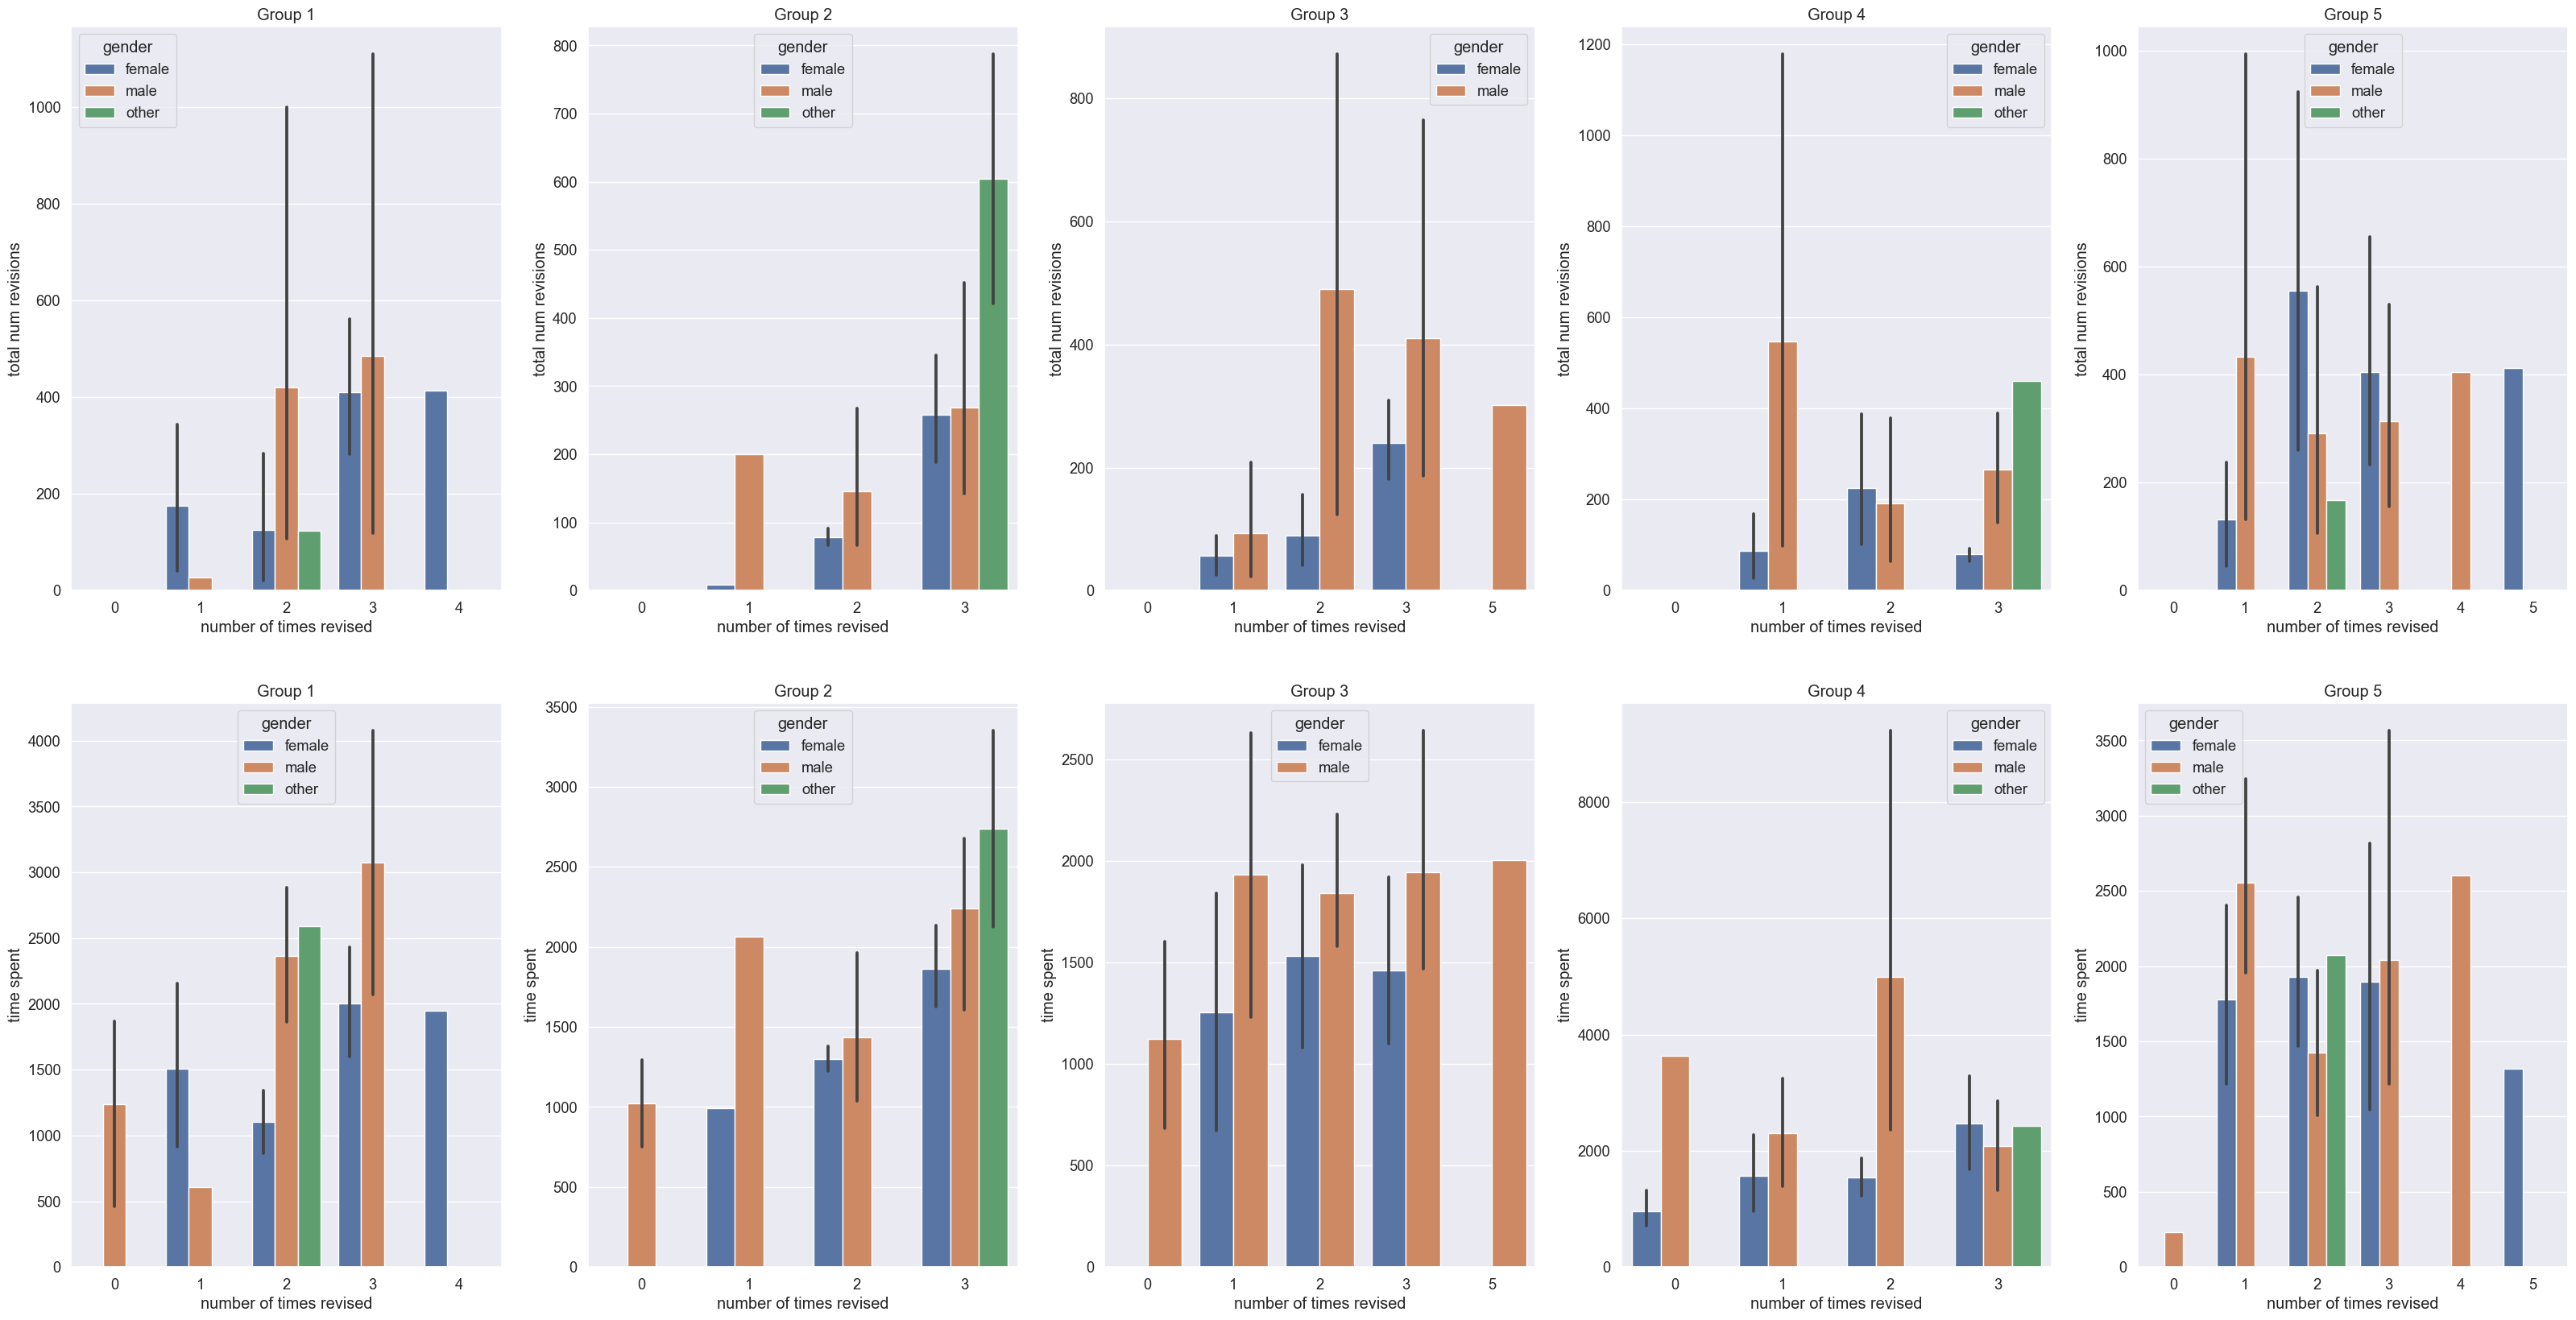

In [10]:
""" sns.barplot(data=data_computation_on_group(GROUP_NUMBER), x='number of times revised', y='total num revisions', hue='gender')
plt.savefig('results/gender study/group{i}.png'.format(i=GROUP_NUMBER))
plt.show()
sns.barplot(data=data_computation_on_group(GROUP_NUMBER), x='number of times revised', y='time spent', hue='gender')
 """

fig, ax = plt.subplots(2, 5, figsize=(40, 20))
for group_number in range(1, 6):
    df = data_computation_on_group(group_number=group_number)    
    sns.barplot(x=df['number of times revised'], y = df['total num revisions'] ,ax=ax[0][group_number-1], hue=df['gender']).set(title='Group {i}'.format(i=group_number))
    sns.barplot(x=df['number of times revised'], y = df['time spent'] ,ax=ax[1][group_number-1], hue=df['gender']).set(title='Group {i}'.format(i=group_number))
    plt.savefig('results/gender study/allgroups combined.png')

#### Interpretations

Men have more revisions on average and the amount of revisions balances out

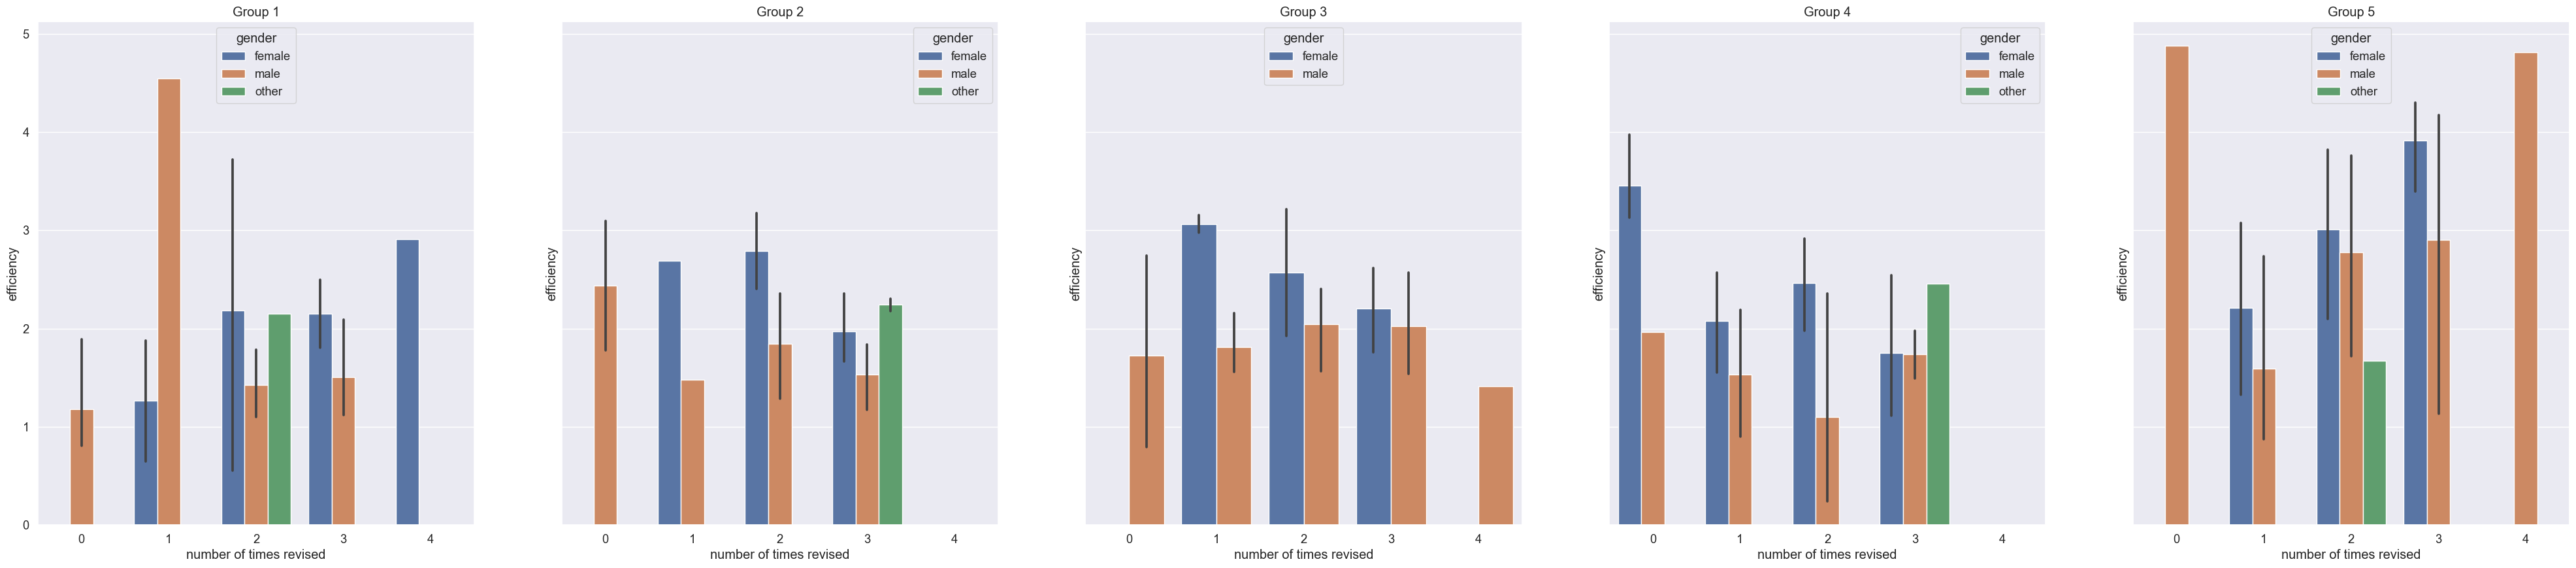

In [14]:
fig, ax = plt.subplots(1, 5, figsize=(50, 10), sharex=True, sharey=True)
for group_number in range(1, 6):
    df = data_computation_on_group(group_number=group_number)  
    df_without_efficiency_outliers=df[(df['efficiency'] < 5) & (df['efficiency'] > 0.1)]
    sns.barplot(x=df_without_efficiency_outliers['number of times revised'], y = df_without_efficiency_outliers['efficiency'] ,ax=ax[group_number-1], hue=df['gender']).set(title='Group {i}'.format(i=group_number))
    plt.savefig('results/gender study/efficiency plots.png')

We do a similar plot for the DIRatio : delete over insert ratio

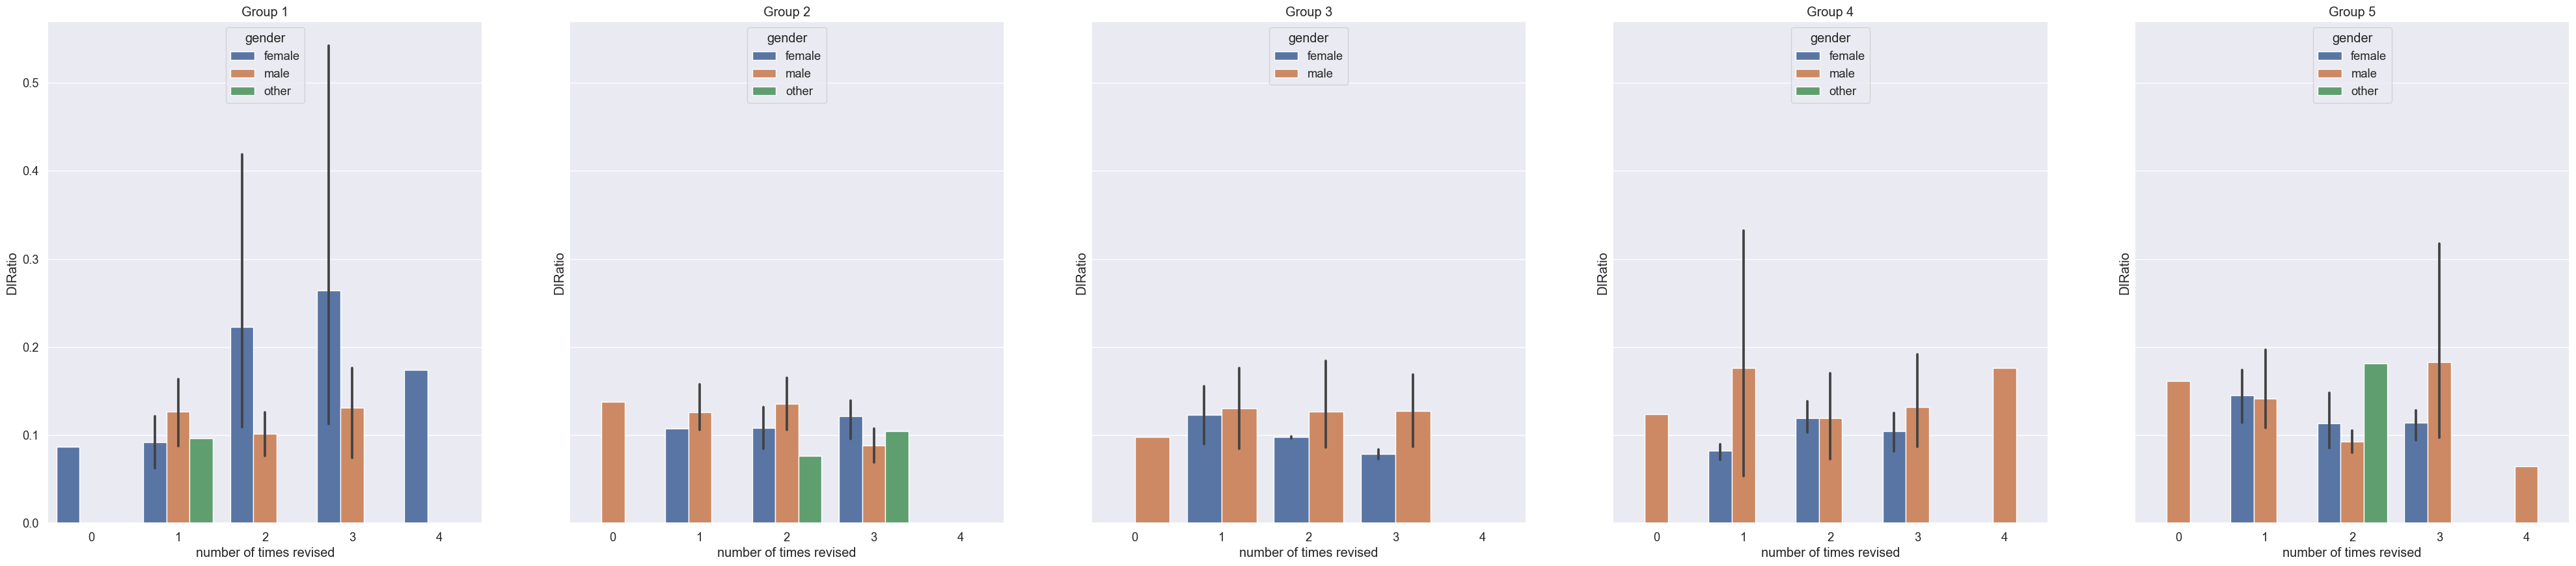

In [15]:
fig, ax = plt.subplots(1, 5, figsize=(50, 10), sharex=True, sharey=True)
for group_number in range(1, 6):
    df = data_computation_on_group(group_number=group_number)  
    sns.barplot(x=df_without_efficiency_outliers['number of times revised'], y = df['DIRatio'] ,ax=ax[group_number-1], hue=df['gender']).set(title='Group {i}'.format(i=group_number))
    plt.savefig('results/gender study/DIRatio plots.png')